In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import requests
import json
from bs4 import BeautifulSoup
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image, FontManager
import ScraperFC as sfc
sofascore = sfc.Sofascore()
from urllib.error import HTTPError

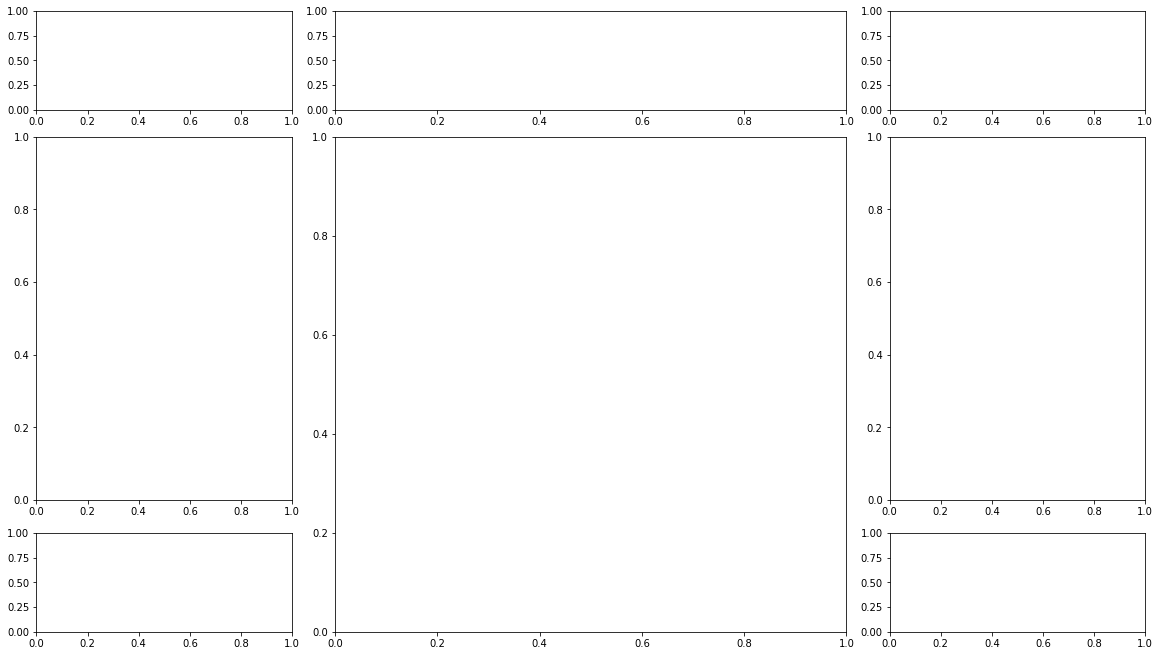

In [34]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=4)
fig.set_facecolor('white')

#Escudo local
ax1 = fig.add_subplot(gs[0,0:1])

#Escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])

ax3 = fig.add_subplot(gs[0,1:3])

ax6 = fig.add_subplot(gs[1:4,:1])

ax10 = fig.add_subplot(gs[4:,:1])

ax7 = fig.add_subplot(gs[1:,1:3])

#Equipo visitante
ax8 = fig.add_subplot(gs[1:4,3:])

ax9 = fig.add_subplot(gs[4:,3:])


In [3]:
fuente1 = FontManager('https://github.com/google/fonts/blob/main/ofl/abeezee/ABeeZee-Regular.ttf?raw=true')

In [5]:
r = requests.get('https://webws.365scores.com/web/game/?appTypeId=5&langId=29&timezoneName=America/Buenos_Aires&userCountryId=382&gameId=4036675&matchupId=11917-17405-419&topBookmaker=14')

In [6]:
partido = r.json()

In [7]:
partido.keys()

dict_keys(['lastUpdateId', 'requestedUpdateId', 'ttl', 'game', 'sports', 'countries', 'competitions'])

In [8]:
momentum = requests.get('https://momentumsr.365scores.com/api/SportRadarMomentum/GetMomentum?partnerId=46927441')

In [9]:
momentum

<Response [200]>

In [10]:
pd.DataFrame(partido['game']['homeCompetitor']['statistics'])

,id,name,categoryId,categoryName,isMajor,value,valuePercentage,isPrimary
0,10,Posesión,1,Posesión,True,56%,0.56,True
1,3,Total Remates,2,Ataque,False,10,0.50,False
2,4,Remates a Puerta,2,Ataque,True,2,0.29,False
3,5,Remates Fuera,2,Ataque,False,8,0.62,False
4,16,Ataques con posibilidad de gol,2,Ataque,False,62,0.44,False
5,8,Saques de Esquina,2,Ataque,True,6,0.60,False
6,9,Fueras de Juego,2,Ataque,True,0,0.00,False
7,13,Saques de falta,2,Ataque,False,4,0.50,False
8,11,Ataques,2,Ataque,False,116,0.47,False
9,29,Substitution,2,Ataque,False,4,0.44,False


In [11]:
pd.DataFrame(partido['game']['awayCompetitor']['statistics'])

,id,name,categoryId,categoryName,isMajor,value,valuePercentage,isPrimary
0,10,Posesión,1,Posesión,True,44%,0.44,True
1,3,Total Remates,2,Ataque,False,10,0.50,False
2,4,Remates a Puerta,2,Ataque,True,5,0.71,False
3,5,Remates Fuera,2,Ataque,False,5,0.38,False
4,16,Ataques con posibilidad de gol,2,Ataque,False,80,0.56,False
5,8,Saques de Esquina,2,Ataque,True,4,0.40,False
6,9,Fueras de Juego,2,Ataque,True,3,1.00,False
7,13,Saques de falta,2,Ataque,False,4,0.50,False
8,11,Ataques,2,Ataque,False,133,0.53,False
9,29,Substitution,2,Ataque,False,5,0.56,False


In [12]:
partido_sofascore = sofascore.get_match_data('https://www.sofascore.com/estudiantes-de-rio-cuarto-deportivo-madryn/vRNbsUIgc#id:11972396')
nombre_local, nombre_visit = sofascore.get_team_names('https://www.sofascore.com/estudiantes-de-rio-cuarto-deportivo-madryn/vRNbsUIgc#id:11972396')
estadisticas_partido = sofascore.get_general_match_stats('https://www.sofascore.com/estudiantes-de-rio-cuarto-deportivo-madryn/vRNbsUIgc#id:11972396')

In [37]:
estadisticas_partido

,name,home,homeValue,homeTotal,away,awayValue,awayTotal
0,Expected goals,0.61,0.61,NaN,0.50,0.5,NaN
0,Ball possession,51%,51.00,NaN,49%,49.0,NaN
0,Total shots,8,8.00,NaN,9,9.0,NaN
1,Shots on target,1,1.00,NaN,3,3.0,NaN
2,Shots off target,4,4.00,NaN,3,3.0,NaN
3,Blocked shots,3,3.00,NaN,3,3.0,NaN
0,Corner kicks,6,6.00,NaN,4,4.0,NaN
1,Offsides,1,1.00,NaN,3,3.0,NaN
2,Fouls,10,10.00,NaN,9,9.0,NaN
3,Yellow cards,2,2.00,NaN,3,3.0,NaN


In [13]:
df_local = sofascore.get_players_match_stats('https://www.sofascore.com/estudiantes-de-rio-cuarto-deportivo-madryn/vRNbsUIgc#id:11972396')[0]
df_visit = sofascore.get_players_match_stats('https://www.sofascore.com/estudiantes-de-rio-cuarto-deportivo-madryn/vRNbsUIgc#id:11972396')[1]

In [38]:
df_local

,name,firstName,lastName,slug,shortName,position,jerseyNumber,userCount,id,country,...,possessionLostCtrl,expectedGoals,ratingVersions,dispossessed,bigChanceCreated,keyPass,expectedAssists,penaltyWon,0,team
0,Williams Barlasina,Williams Barlasina,,williams-barlasina,W. Barlasina,G,31,15,1086950,"{'alpha2': 'AR', 'name': 'Argentina'}",...,5.0,0.00,"{'original': 7.7, 'alternative': None}",NaN,NaN,NaN,NaN,NaN,NaN,Estudiantes de Río Cuarto
1,Valentin Fenoglio,NaN,NaN,valentin-fenoglio,V. Fenoglio,F,20,0,1500069,"{'alpha2': 'AR', 'name': 'Argentina'}",...,9.0,0.00,"{'original': 7.2, 'alternative': None}",NaN,NaN,NaN,NaN,NaN,NaN,Estudiantes de Río Cuarto
2,Gastón Arturia,NaN,NaN,gaston-arturia,G. Arturia,D,4,3,1018403,"{'alpha2': 'AR', 'name': 'Argentina'}",...,7.0,0.07,"{'original': 7, 'alternative': None}",NaN,NaN,NaN,NaN,NaN,NaN,Estudiantes de Río Cuarto
3,Marcio Gómez Pereyra,Marcio,Gómez Pereyra,marcio-gomez-pereyra,M. G. Pereyra,D,NaN,0,1597632,"{'alpha2': 'AR', 'name': 'Argentina'}",...,11.0,0.00,"{'original': 6.7, 'alternative': None}",NaN,NaN,NaN,NaN,NaN,NaN,Estudiantes de Río Cuarto
4,Luis Abraham,,,luis-abraham,L. Abraham,D,3,1,1183794,"{'alpha2': 'AR', 'name': 'Argentina'}",...,18.0,0.00,"{'original': 7.9, 'alternative': None}",1.0,1.0,2.0,0.30,NaN,NaN,Estudiantes de Río Cuarto
5,Francisco Romero,NaN,NaN,francisco-romero,F. Romero,M,11,3,871849,"{'alpha2': 'AR', 'name': 'Argentina'}",...,6.0,0.00,"{'original': 7.7, 'alternative': None}",NaN,NaN,2.0,0.13,NaN,NaN,Estudiantes de Río Cuarto
6,Jonatan Blanco,NaN,NaN,jonatan-blanco,J. Blanco,M,NaN,2,79286,"{'alpha2': 'AR', 'name': 'Argentina'}",...,9.0,0.05,"{'original': 7.1, 'alternative': None}",1.0,NaN,1.0,0.03,NaN,NaN,Estudiantes de Río Cuarto
7,Nahuel Cainelli,NaN,NaN,nahuel-cainelli,N. Cainelli,M,8,6,981460,"{'alpha2': 'AR', 'name': 'Argentina'}",...,12.0,0.00,"{'original': 6.7, 'alternative': None}",NaN,NaN,NaN,NaN,NaN,NaN,Estudiantes de Río Cuarto
8,Tomás González,Tomás González,NaN,tomas-gonzalez,T. González,NaN,NaN,0,1650474,"{'alpha2': 'AR', 'name': 'Argentina'}",...,16.0,0.00,"{'original': 7.2, 'alternative': None}",NaN,NaN,3.0,0.10,NaN,NaN,Estudiantes de Río Cuarto
9,Mauro Valiente,NaN,NaN,mauro-valiente,M. Valiente,M,7,20,951719,"{'alpha2': 'AR', 'name': 'Argentina'}",...,15.0,0.06,"{'original': 6.7, 'alternative': None}",1.0,NaN,NaN,NaN,NaN,NaN,Estudiantes de Río Cuarto


In [39]:
df_visit.columns

Index([                  'name',                   'slug',
                    'shortName',               'position',
                 'jerseyNumber',              'userCount',
                           'id',                'country',
          'marketValueCurrency',   'dateOfBirthTimestamp',
                    'firstName',               'lastName',
                  'shirtNumber',           'jerseyNumber',
                     'position',             'substitute',
                    'totalPass',           'accuratePass',
               'totalLongBalls',      'accurateLongBalls',
                   'goalAssist',             'totalCross',
                'accurateCross',             'aerialLost',
                    'aerialWon',               'duelLost',
                      'duelWon',          'challengeLost',
                 'totalContest',             'wonContest',
                'shotOffTarget', 'onTargetScoringAttempt',
                        'goals',         'totalClearance

In [32]:
lista_mayores = ['expectedAssists', 'duelWon', 'touches', 'expectedGoals']
nombre_mayores_local = []
valor_mayores_local = []
nombre_mayores_visit = []
valor_mayores_visit = []

for i in range(len(lista_mayores)):
    nombre = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_local.append(nombre)
    valor_mayores_local.append(valor)

for i in range(len(lista_mayores)):
    nombre = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_visit.append(nombre)
    valor_mayores_visit.append(valor)

nombre_mayores_local, valor_mayores_local

(['Luis Abraham',
  'Luis Abraham',
  'Luis Abraham',
  'Guillermo Gabriel Villalba'],
 [0.3, 15.0, 56.0, 0.43])

In [16]:
jugador_destacado_local = df_local[['name','rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
jugador_destacado_visit = df_visit[['name','rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
id_jug_local = df_local[df_local['name'] == jugador_destacado_local].id.values[0]
id_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit].id.values[0]
try:
    imagen_jug_local = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_jug_local}/image'))
except HTTPError:
    imagen_jug_local = ''

try:
    imagen_jug_visit = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_jug_visit}/image'))
except HTTPError:
    imagen_jug_visit = ''   

In [17]:
df_jug_local = df_local[df_local['name'] == jugador_destacado_local]
df_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit]


In [18]:
df_jug_local.columns

Index([                      'name',                  'firstName',
                         'lastName',                       'slug',
                        'shortName',                   'position',
                     'jerseyNumber',                  'userCount',
                               'id',                    'country',
              'marketValueCurrency',       'dateOfBirthTimestamp',
                      'shirtNumber',               'jerseyNumber',
                         'position',                 'substitute',
                        'totalPass',               'accuratePass',
                   'totalLongBalls',          'accurateLongBalls',
                       'goalAssist',                 'totalCross',
                    'accurateCross',                 'aerialLost',
                        'aerialWon',                   'duelLost',
                          'duelWon',              'challengeLost',
                     'totalContest',                 'wonConte

In [19]:
idlocal = partido_sofascore['homeTeam']['id']
idvisit = partido_sofascore['awayTeam']['id']

In [20]:
imagen1 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idlocal}/image'))
imagen2 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idvisit}/image'))

In [21]:
goleslocal = partido_sofascore['homeScore']['normaltime']
golesvisit = partido_sofascore['awayScore']['normaltime']


In [22]:
partido_sofascore

{'tournament': {'name': 'Primera B Nacional',
  'slug': 'primera-b-nacional',
  'category': {'name': 'Argentina',
   'slug': 'argentina',
   'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
   'id': 48,
   'country': {'alpha2': 'AR', 'name': 'Argentina'},
   'flag': 'argentina',
   'alpha2': 'AR'},
  'uniqueTournament': {'name': 'Primera Nacional',
   'slug': 'primera-nacional',
   'primaryColorHex': '#145286',
   'secondaryColorHex': '#27A4DE',
   'category': {'name': 'Argentina',
    'slug': 'argentina',
    'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
    'id': 48,
    'country': {'alpha2': 'AR', 'name': 'Argentina'},
    'flag': 'argentina',
    'alpha2': 'AR'},
   'userCount': 9210,
   'id': 703,
   'country': {},
   'hasEventPlayerStatistics': False,
   'crowdsourcingEnabled': False,
   'hasPerformanceGraphFeature': False,
   'displayInverseHomeAwayTeams': False},
  'priority': 0,
  'competitionType': 1,
  'id': 5071},
 'season': {'name': 'Primera Nacion

In [23]:
torneo = partido_sofascore['season']['name']
fecha = partido_sofascore['roundInfo']['round']

In [24]:
f'{nombre_local} - {nombre_visit}'

'Estudiantes de Río Cuarto - Deportivo Madryn'

In [25]:
def sacar_spines(ax):
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [26]:
lista_estadisticas_partido = ['Expected goals', 'Ball possession', 'Total shots', 'Shots on target', 'Corner kicks', 'Fouls', 'Yellow cards', 'Red cards', 'Counter attacks', 'Goalkeeper saves', 'Accurate passes', 'Duels won', 'Tackles', 'Interceptions', 'Clearances']
#lista_dashboard = ['Expected goals', 'Ball possession', 'Total shots', 'Shots on target', 'Corner kicks', 'Fouls', 'Tarjetas', 'Counter attacks', 'Goalkeeper saves', 'Accurate passes', 'Duels won', 'Acc. defensivas']
lista_valores_partido_local = []
lista_valores_partido_visit = []

for i in range(len(lista_estadisticas_partido)):
    valor = estadisticas_partido[estadisticas_partido['name'] == lista_estadisticas_partido[i]]['home'].values[0]
    lista_valores_partido_local.append(valor)

for i in range(len(lista_estadisticas_partido)):
    valor = estadisticas_partido[estadisticas_partido['name'] == lista_estadisticas_partido[i]]['away'].values[0]
    lista_valores_partido_visit.append(valor)


In [27]:
lista_valores_partido_visit

['0.50',
 '49%',
 '9',
 '3',
 '4',
 '9',
 '3',
 '0',
 '0',
 '1',
 '227 (73%)',
 '96',
 '7',
 '61',
 '12']

F
F


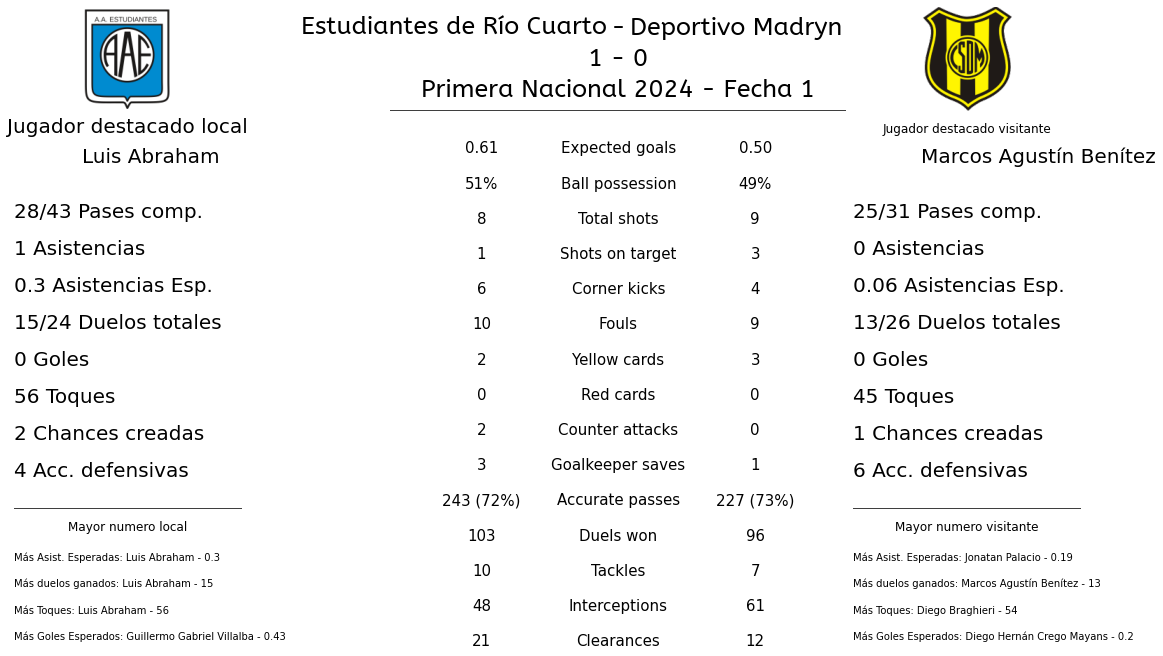

In [44]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=4)
fig.set_facecolor('white')

#Escudo local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.imshow(imagen1)
sacar_spines(ax1)

#Escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])
ax2.imshow(imagen2)
sacar_spines(ax2)

ax3 = fig.add_subplot(gs[0,1:3])
ax3.text(.475,.8,f'{nombre_local}', ha='right', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.525,.8,f'{nombre_visit}', ha='left', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5,.8,'-', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5,.5,f'{goleslocal} - {golesvisit}', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5,.2,f'{torneo} - Fecha {fecha}', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.axhline(0, color='black')
sacar_spines(ax3)


lista_estadisticas = ['totalPass', 'accuratePass', 'goalAssist', 'duelWon', 'duelLost', 'expectedAssists', 'keyPass', 'touches', 'goals', 'totalTackle', 'interceptionWon', 'totalClearance']
valores_jug_local = df_jug_local[lista_estadisticas].values
ax6 = fig.add_subplot(gs[1:4,:1])
ax6.set_title('Jugador destacado local', size=20)
if imagen_jug_local:
    ax_image2 = add_image(
                imagen_jug_local, fig, left=0.113, bottom=0.67, width=0.055, height=0.055
            )
else:
    print('F')
ax6.text(.3,.95,f'{jugador_destacado_local}', ha='left', va='center', size=20)
ax6.text(0,.8,f'{int(valores_jug_local[0][1])}/{int(valores_jug_local[0][0])} Pases comp.', ha='left', va='center', size=20)
ax6.text(0,.7,f'{int(valores_jug_local[0][2])} Asistencias', ha='left', va='center', size=20)
ax6.text(0,.6,f'{float(valores_jug_local[0][5])} Asistencias Esp.', ha='left', va='center', size=20)
ax6.text(0,.5,f'{int(valores_jug_local[0][3])}/{int(valores_jug_local[0][4])+int(valores_jug_local[0][3])} Duelos totales', ha='left', va='center', size=20)
ax6.text(0,.4,f'{int(valores_jug_local[0][8])} Goles', ha='left', va='center', size=20)
ax6.text(0,.3,f'{int(valores_jug_local[0][7])} Toques', ha='left', va='center', size=20)
ax6.text(0,.2,f'{int(valores_jug_local[0][6])} Chances creadas', ha='left', va='center', size=20)
ax6.text(0,.1,f'{int(valores_jug_local[0][9])+int(valores_jug_local[0][10])+int(valores_jug_local[0][11])} Acc. defensivas', ha='left', va='center', size=20)
ax6.axhline(0, color='black')
sacar_spines(ax6)


ax10 = fig.add_subplot(gs[4:,:1])
ax10.set_title('Mayor numero local')
ax10.text(0,.8, f'Más Asist. Esperadas: {nombre_mayores_local[0]} - {valor_mayores_local[0]}', ha='left', va='center')
ax10.text(0,.55, f'Más duelos ganados: {nombre_mayores_local[1]} - {int(valor_mayores_local[1])}', ha='left', va='center')
ax10.text(0,.3, f'Más Toques: {nombre_mayores_local[2]} - {int(valor_mayores_local[2])}', ha='left', va='center')
ax10.text(0,.05, f'Más Goles Esperados: {nombre_mayores_local[3]} - {valor_mayores_local[3]}', ha='left', va='center')
sacar_spines(ax10)

ax7 = fig.add_subplot(gs[1:,1:3])
i = 1.08
for n in range(len(lista_estadisticas_partido)):
    ax7.text(.5, i-.1, lista_estadisticas_partido[n], ha='center', va='center', size=15)
    i-=.07

i = 1.08
for n in range(len(lista_valores_partido_local)):
    ax7.text(.2, i-.1, lista_valores_partido_local[n], ha='center', va='center', size=15)
    i-=.07

i = 1.08
for n in range(len(lista_valores_partido_visit)):
    ax7.text(.8, i-.1, lista_valores_partido_visit[n], ha='center', va='center', size=15)
    i-=.07
sacar_spines(ax7)

#Equipo visitante
ax8 = fig.add_subplot(gs[1:4,3:])
ax8.set_title('Jugador destacado visitante')
valores_jug_visit = df_jug_visit[lista_estadisticas].values
if imagen_jug_visit:
    ax_image2 = add_image(
                imagen_jug_visit, fig, left=0.113, bottom=0.67, width=0.055, height=0.055
            )
else:
    print('F')
ax8.text(.3,.95,f'{jugador_destacado_visit}', ha='left', va='center', size=20)
ax8.text(0,.8,f'{int(valores_jug_visit[0][1])}/{int(valores_jug_visit[0][0])} Pases comp.', ha='left', va='center', size=20)
ax8.text(0,.7,f'{int(valores_jug_visit[0][2])} Asistencias', ha='left', va='center', size=20)
ax8.text(0,.6,f'{float(valores_jug_visit[0][5])} Asistencias Esp.', ha='left', va='center', size=20)
ax8.text(0,.5,f'{int(valores_jug_visit[0][3])}/{int(valores_jug_visit[0][4])+int(valores_jug_visit[0][3])} Duelos totales', ha='left', va='center', size=20)
ax8.text(0,.4,f'{int(valores_jug_visit[0][8])} Goles', ha='left', va='center', size=20)
ax8.text(0,.3,f'{int(valores_jug_visit[0][7])} Toques', ha='left', va='center', size=20)
ax8.text(0,.2,f'{int(valores_jug_visit[0][6])} Chances creadas', ha='left', va='center', size=20)
ax8.text(0,.1,f'{int(valores_jug_visit[0][9])+int(valores_jug_visit[0][10])+int(valores_jug_visit[0][11])} Acc. defensivas', ha='left', va='center', size=20)
ax8.axhline(0, color='black')
sacar_spines(ax8)

ax9 = fig.add_subplot(gs[4:,3:])
ax9.set_title('Mayor numero visitante')
ax9.text(0,.8, f'Más Asist. Esperadas: {nombre_mayores_visit[0]} - {valor_mayores_visit[0]}', ha='left', va='center')
ax9.text(0,.55, f'Más duelos ganados: {nombre_mayores_visit[1]} - {int(valor_mayores_visit[1])}', ha='left', va='center')
ax9.text(0,.3, f'Más Toques: {nombre_mayores_visit[2]} - {int(valor_mayores_visit[2])}', ha='left', va='center')
ax9.text(0,.05, f'Más Goles Esperados: {nombre_mayores_visit[3]} - {valor_mayores_visit[3]}', ha='left', va='center')
sacar_spines(ax9)